<a href="https://colab.research.google.com/github/UdiFlpb/Web-Application-Development-Final-Project/blob/main/Copy_of_mid_sem_bodl_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mid-semester assignment Part 1 - Basics of deep learning
Hello dear students,<br> this is the template notebook. Please upload it into your drive and open as Google Colab nootebook".

---
<br>

### Name and ID:
Student 1:
<br>
Student 2:

## Fashion MNIST
Fashion MNIST dataset contains 70,000 grayscale images in 10 categories. The images show individual articles of clothing at low resolution (28 by 28 pixels), as seen here:

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  
</table>



Loading the dataset returns four NumPy arrays:

* The `train_images` and `train_labels` arrays are the *training set*—the data the model uses to learn.
* The model is tested against the *test set*, the `test_images`, and `test_labels` arrays.

The images are 28x28 NumPy arrays, with pixel values ranging between 0 and 255. The *labels* are an array of integers, ranging from 0 to 9. These correspond to the *class* of clothing the image represents:

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

<br>

# Goodluck!

#Neural Network in plain NumPy

## Import Libraries

In [ ]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.metrics import classification_report, confusion_matrix


## Load Dataset

In [ ]:
X, y = fetch_openml('Fashion-MNIST', version=1, return_X_y=True, as_frame=False)
print(X.shape, y.shape)

(70000, 784) (70000,)


## Data preprocessing (10%)

### Feature scaling

In [ ]:
examples = y.shape[0]
y1 = y.reshape(1, examples)
X1 = X / 255
X1 = X1.T
print(X1.shape)
print(y1.shape)

(784, 70000)
(1, 70000)


### Select two classes

In [ ]:
#TODO: select two classes (for example 2-Pullover and 4-Coat)

#Lets filter for 1-Trousers and 0-Tshirt/tops
filtered_array= y1[0][(y1[0]=='0') | (y1[0]=='1')]

y_filtered=np.array(filtered_array.reshape(1, filtered_array.shape[0]))


filtered_X1 = [X1[:,key] for (key, class_label) in enumerate(y1[0]) if class_label == '0' or class_label == '1']

X1_filtered= np.array(filtered_X1).T

print(X1_filtered.shape)
print(y_filtered.shape)


(784, 14000)
(1, 14000)


### Split the data into Train set and Test set

In [ ]:
# TODO: Split the data into Train set and Test set (The use of libraries other than Numpy is strictly prohibited)
from sklearn.utils import shuffle

X = X1_filtered
Y = y_filtered

# Use shuffle on the train data
X, y = shuffle(X1_filtered.T, y_filtered.T)

filtered_samples_X= round(len(X)*.90)
filtered_samples_y= round(len(y)*.90)
X_train, X_test = X[:filtered_samples_X,:].T, X[filtered_samples_X:,:].T

print(X_train.shape)
print(X_test.shape)
Y_train, Y_test = y[:filtered_samples_y,:].T, y[filtered_samples_y:,:].T


print(Y_train.shape)
print(Y_test.shape)

(784, 12600)
(784, 1400)
(1, 12600)
(1, 1400)


### Test yourself

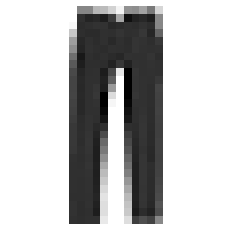

'1'

In [ ]:
# Test yourself (Check that the classes you have selected are actually displayed)
%matplotlib inline
from numpy import random

i = random.randint(100)
plt.imshow(X_train[:,i].reshape(28,28), cmap = matplotlib.cm.binary)
plt.axis("off")
plt.show()
Y_train.T[i,0]

## Activation functions (10%)

In [ ]:
#TODO: Sigmoid activation function
def sigmoid(z):
    return (1/(1+np.exp(-z)))

## Loss function (20%)
BCE Loss function captures the intuition that the neural network should pay a high penalty(Loss→∞) when the estimated probability, with respect to the training example’s label, is completely wrong. On the other hand, the Loss should equal zero(Loss=0) when the estimated probability, with respect to the training example’s label, is correct. Simply put, the BCE Loss should equal zero in only two instances:<br>
* if the example is positively labeled(y=1) the neural network model should be completely sure that the example belongs to the positive class i.e p̂=1.
* if the example is negatively labeled(y=0) the neural network model should be completely sure that the example does not belong to the positive class i.e p̂=0.

<b> When we work with a computer, there are very high values or very low values that it cannot handle and that could cause the system to crash. <br>In order to overcome the case where the function returns values that strive for infinity you will need to understand which range of values causes the logarithm to return inf \ -inf and handle this within the function. </b>

In [ ]:
#TODO: Binary cross entropy
def log_loss(y_hat, y):
  
    es= 1e-15
    predicted_probability = np.clip(y_hat, es, 1 - es)
    result= (-((y * np.log10(predicted_probability)) + (1-y) * np.log10(1-predicted_probability))).mean()

    return result


## NN Hyper Parameters

In [ ]:
input_layer = X_train.shape[0] # 28X28 = 784
hidden_layer = X_train.shape[0]
learning_rate = 0.35
epochs = 10

## Weight and Bias Initialization

In [ ]:
W1 = np.random.randn(hidden_layer, input_layer)*0.01
b1 = np.zeros((hidden_layer, 1))
W2 = np.random.randn(1, hidden_layer)*0.01
b2 = np.zeros((1, 1))

print(W1.shape)
print(b1.shape)
print(W2.shape)
print(b2.shape)

(784, 784)
(784, 1)
(1, 784)
(1, 1)


## Training (30%)

In [40]:
X = X_train
Y = Y_train
loss_list = []
epoch_list = []
numOfTraining = X_train.shape[1] # Write the number of examples in your train set


def f_forward(x, w1, w2):
    # hidden
    z1 = x.dot(w1)# input from layer 1
    a1 = sigmoid(z1)# out put of layer 2
     
    # Output layer
    z2 = a1.dot(w2.T)# input of out layer
    a2 = sigmoid(z2)# output of out layer
    return(a2)

# Back propagation of error
def back_prop(x, y, w1, w2, alpha):
     
    # hidden layer
    z1 = x.dot(w1)  
    a1 = sigmoid(z1) 
    #print(a1.reshape(1,-1).shape)
     
    # Output layer
    z2 = a1.dot(w2.T)# input of out layer
    a2 = sigmoid(z2)# output of out layer
    #print(a2.shape)
    # error in output layer
    d2 =(a2-np.array(float(y),))
    #print(d2.shape)
    d1 = np.multiply((w2.T.dot((d2.transpose()))).transpose(),
                                   (np.multiply(a1, 1-a1)))
 
    # Gradient for w1 and w2
    w1_adj = x.transpose().dot(d1)
    w2_adj = a1.reshape(-1,1).dot(d2)
     
    # Updating parameters
    w1 = w1-(alpha*(w1_adj))
    w2 = w2-(alpha*(w2_adj))
     
    return(w1, w2)

for i in range(epochs):
  epoch_list.append(i)
  for j in range(1,numOfTraining):

    out = f_forward(X[:,j], W1, W2)

    W1, W2 = back_prop(X[:,j], Y[0][j], W1, W2, learning_rate)

  loss_list.append((log_loss(out, float(Y[0][j]))))

  print('avg_epoch_loss')
  print((log_loss(out, float(Y[0][j]))))


<ipython-input-24-d132732958d0>:3: RuntimeWarning: overflow encountered in exp
  return (1/(1+np.exp(-z)))


avg_epoch_loss
0.3010299956639812
avg_epoch_loss
0.3010299956639812
avg_epoch_loss
0.3010299956639812
avg_epoch_loss
0.3010299956639812
avg_epoch_loss
0.3010299956639812
avg_epoch_loss
0.3010299956639812
avg_epoch_loss
0.3010299956639812
avg_epoch_loss
0.3010299956639812
avg_epoch_loss
0.3010299956639812
avg_epoch_loss
0.3010299956639812


### Loss Visualization

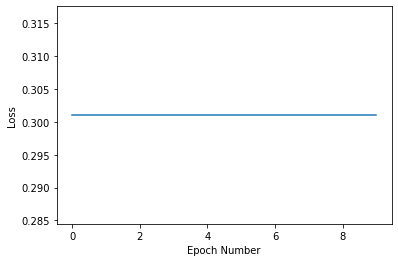

In [41]:
import matplotlib.pyplot as plt
plt.xlabel('Epoch Number')
plt.ylabel("Loss")
plt.plot(epoch_list, loss_list)

## Results

### Test your performance (30%)

In [42]:
#TODO: Forward batch of examples
X = X_test
Y = Y_test

Out=[]
for j in range(X_test.shape[0]):

  Out.append(f_forward(X_test[:,j], W1, W2))
  predictions = np.zeros((1,Y.shape[1]))
  labels = np.zeros((1,Y.shape[1]))

  for i in range(len(Out[0])):
    if(Out[0][i]>0.5):
        predictions.tolist().append(1)
        labels.tolist().append(Y_test[0][i])


# Print the confusion matrix In order to test your performance
print(confusion_matrix(predictions[0], labels[0]))

#Print Accuracy
from sklearn.metrics import accuracy_score
print(accuracy_score(predictions[0], labels[0])*100,"%")

[[1400]]
100.0 %


### Visualize the results

134


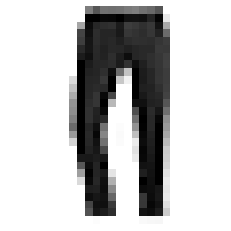

Real= 1 Predicted= [[0.99999999]]
135


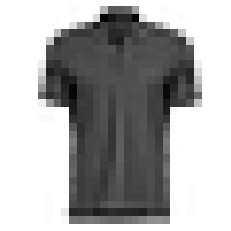

Real= 0 Predicted= [[1.]]
136


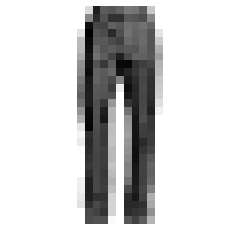

Real= 1 Predicted= [[0.99999966]]
137


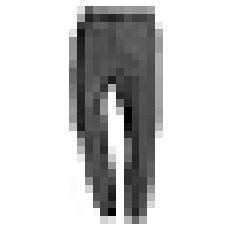

Real= 1 Predicted= [[0.99999976]]
138


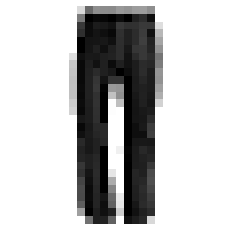

Real= 1 Predicted= [[1.]]
139


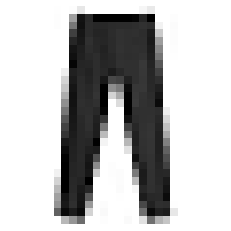

Real= 1 Predicted= [[1.]]
140


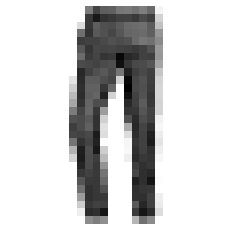

Real= 1 Predicted= [[0.99999965]]
141


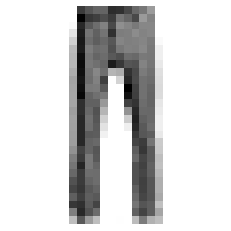

Real= 1 Predicted= [[0.99999855]]
142


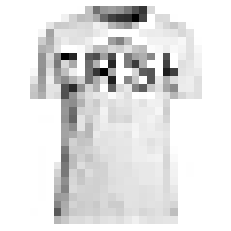

Real= 0 Predicted= [[0.99981374]]
143


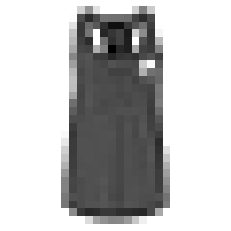

Real= 0 Predicted= [[1.]]
144


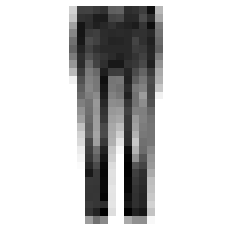

Real= 1 Predicted= [[0.99999987]]


In [43]:
#TODO: SHOW VISUALLY RESULTS ON 10 TEST EXAMPLES
%matplotlib inline
from numpy import random

j = random.randint(100, 200)


for i in range(j,j+11,1):
  print(i)
  plt.imshow(X_test[:,i].reshape(28,28), cmap = matplotlib.cm.binary)
  plt.axis("off")
  plt.show()
  Y_test.T[i,0]

  Z1 = np.matmul(W1,X_test[:,i]) +b1
  A1 =sigmoid(Z1)
  Z2 = np.matmul(W2,X_test[:,i]) +b2
  A2 = sigmoid(Z2)
  Yout = Y.T[i,0] 
  print("Real=", Y_test.T[i,0], "Predicted=",A2)
